In [3]:
import os
# change work directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/Classification


In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from src.common.utils import load_model, load_metrics, plot_learning_curve, save_plot, save_model, save_metrics, load_cv_results, format_cv_results, plot_complexity_curve, plot_training_time

In [12]:
# Constant variables
input_dir = 'results/dataset2/model_outputs'
#input_dir2 =  'results/dataset1/model_outputs2'
output_dir = 'figures/dataset2'
#output_dir2 = 'figures/dataset1_2'
name = 'nlp'

if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
# if not os.path.exists(output_dir2):
#     os.makedirs(output_dir2, exist_ok=True)

# KNN

In [13]:
# load the best model param
best_model = load_model(input_dir, 'knn', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs/knn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/knn_nlp_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
the metrics of testing dataset: {'accuracy': 0.8214285714285714, 'precision': 0.8731707317073171, 'recall': 0.8026905829596412, 'f1': 0.8364485981308412}


## learning curve

In [14]:
lc_data = load_metrics(input_dir, 'knn', f'{name}_lc')

Metrics loaded successfully from results/dataset2/model_outputs/knn_nlp_lc_metrics.json


Plot saved successfully at figures/dataset2/knn_lc_nlp.png


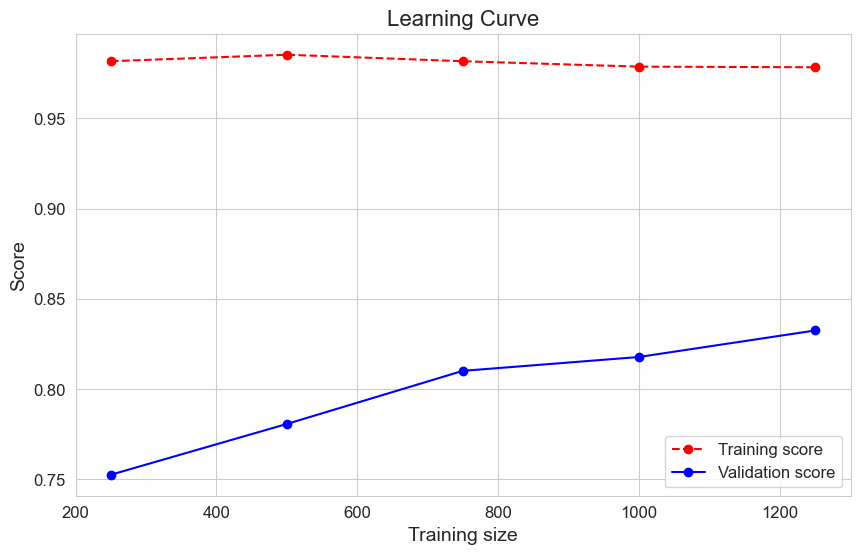

In [15]:
lc_plot = plot_learning_curve(lc_data, 'knn')
# save 
save_plot(lc_plot, output_dir, 'knn', 'lc', name)

## Complexity curve

In [16]:
cv_results_df = pd.read_csv(f'{input_dir}/knn_cv_results.csv') 
cv_results_df

,n_neighbors,weights,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,1,uniform,0.001572,0.000756,0.007733,0.001935,0.797968,0.015537,0.965633,0.001677,0.034367,0.202032
1,1,distance,0.001841,0.000721,0.008488,0.001556,0.797968,0.015537,0.965633,0.001677,0.034367,0.202032
2,2,uniform,0.001452,0.000720,0.007276,0.001284,0.793493,0.018979,0.873242,0.002433,0.126758,0.206507
3,2,distance,0.001497,0.000583,0.008446,0.002066,0.808194,0.013270,0.965473,0.002553,0.034527,0.191806
4,3,uniform,0.001033,0.000537,0.008281,0.002209,0.831214,0.021625,0.912085,0.007089,0.087915,0.168786
5,3,distance,0.001215,0.000451,0.008541,0.002375,0.832488,0.020415,0.978261,0.002226,0.021739,0.167512
6,4,uniform,0.001240,0.000466,0.011356,0.002128,0.801804,0.015226,0.867329,0.007282,0.132671,0.198196
7,4,distance,0.001253,0.000380,0.010724,0.001395,0.821619,0.015359,0.975385,0.004082,0.024615,0.178381
8,5,uniform,0.000936,0.000345,0.012127,0.003549,0.809497,0.028022,0.879957,0.007042,0.120043,0.190503
9,5,distance,0.001512,0.001281,0.009708,0.001490,0.813324,0.021648,0.977302,0.003374,0.022698,0.186676


### Neighbors

Plot saved successfully at figures/dataset2/knn_cc_neigbor_uniform_nlp.png


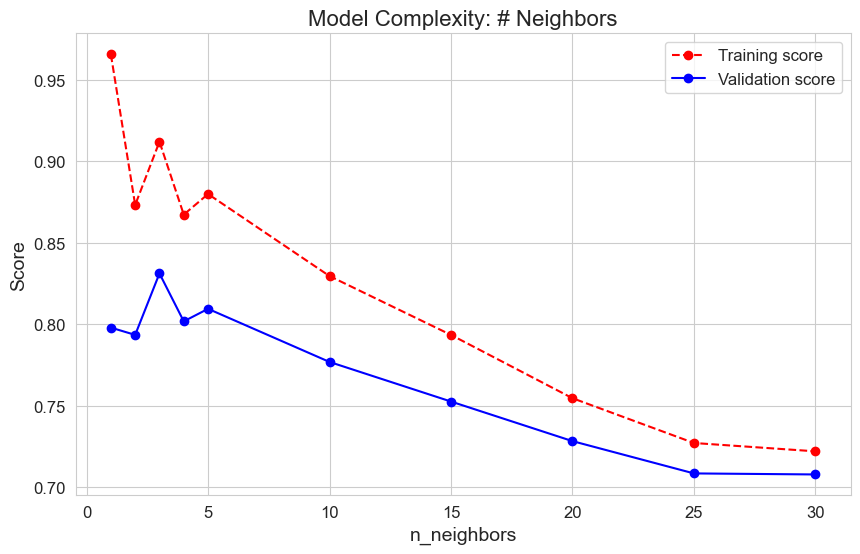

In [17]:
cv_results_uniform = cv_results_df[cv_results_df['weights']== 'uniform']
cc_plt, _ = plot_complexity_curve(cv_results_uniform, 'n_neighbors','mean_train_score', 'mean_test_score', 'Model Complexity: # Neighbors')
# save
save_plot(cc_plt, output_dir, 'knn', 'cc_neigbor_uniform', name)

Plot saved successfully at figures/dataset2/knn_cc_neigbor_distance_nlp.png


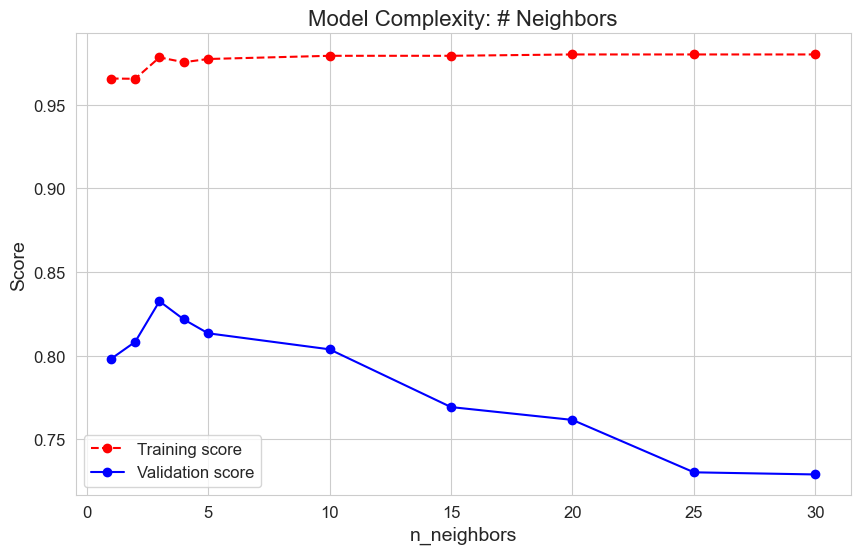

In [18]:
cv_results_distance = cv_results_df[cv_results_df['weights']== 'distance']
cc_plt, _ = plot_complexity_curve(cv_results_distance, 'n_neighbors','mean_train_score', 'mean_test_score', 'Model Complexity: # Neighbors')
# save
save_plot(cc_plt, output_dir, 'knn', 'cc_neigbor_distance', name)

## Trainig time 

Plot saved successfully at figures/dataset2/knn_tt_neighbors_distance_nlp.png


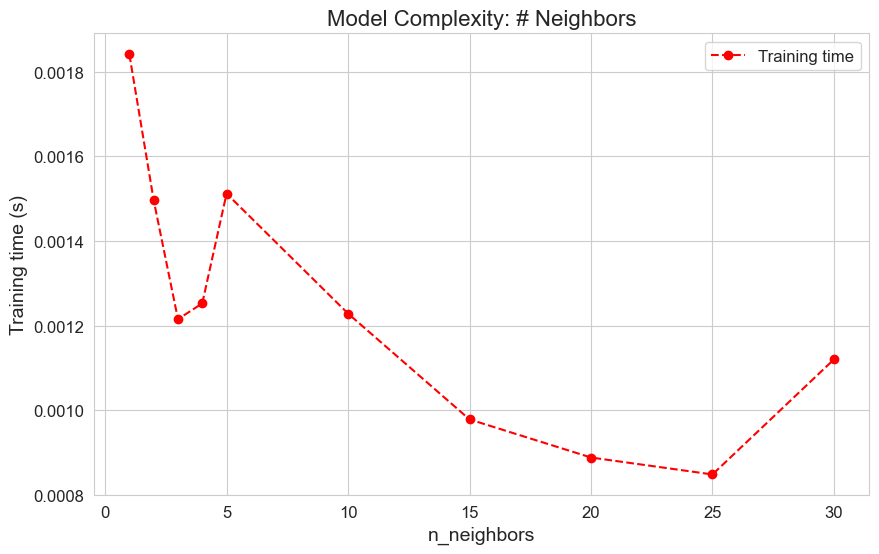

In [19]:
tt_plt = plot_training_time(cv_results_distance, 'n_neighbors', 'mean_fit_time', 'Model Complexity: # Neighbors')
# save
save_plot(tt_plt, output_dir, 'knn', 'tt_neighbors_distance', name)

# SVM

In [20]:
best_model = load_model(input_dir, 'svm', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs/svm_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/knn_nlp_metrics.json
the best model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 17, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.8214285714285714, 'precision': 0.8731707317073171, 'recall': 0.8026905829596412, 'f1': 0.8364485981308412}


## learning curve

Metrics loaded successfully from results/dataset2/model_outputs/svm_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/svm_lc_nlp.png


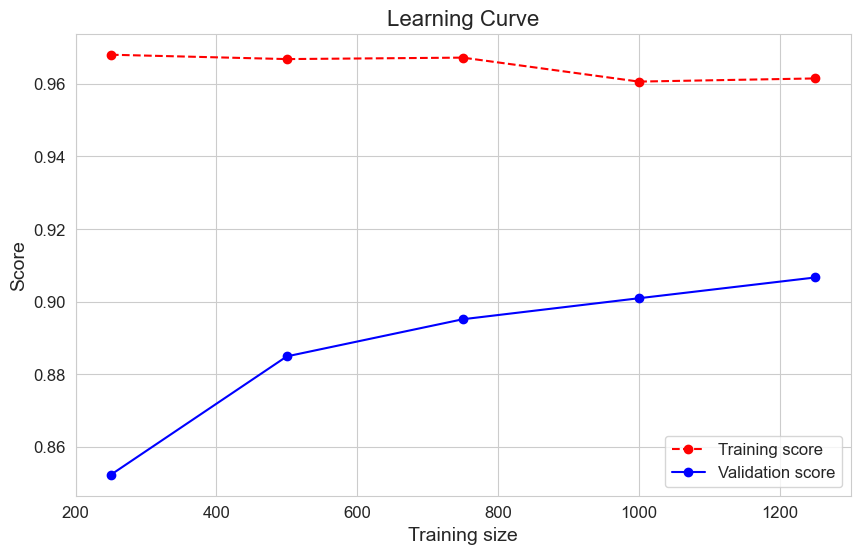

In [21]:
lc_data = load_metrics(input_dir, 'svm', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'svm')
# save 
save_plot(lc_plot, output_dir, 'svm', 'lc', name)

## Complexity curve

In [22]:
cv_results_df = pd.read_csv(f'{input_dir}/svm_cv_results.csv')
cv_results_df

,gamma,kernel,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,scale,rbf,0.075439,0.006752,0.018059,0.003727,0.906013,0.011691,0.961478,0.003610,0.038522,0.093987
1,scale,sigmoid,0.046756,0.004160,0.011480,0.001423,0.866372,0.009728,0.889864,0.006523,0.110136,0.133628
2,scale,linear,0.049032,0.003014,0.009650,0.001161,0.899621,0.010953,0.930147,0.001876,0.069853,0.100379
3,scale,poly,0.106622,0.007434,0.016997,0.000849,0.887495,0.024118,0.974265,0.001280,0.025735,0.112505
4,auto,rbf,0.106030,0.003773,0.024031,0.003464,0.553209,0.109613,0.561662,0.122524,0.438338,0.446791
5,auto,sigmoid,0.101124,0.007700,0.021708,0.001429,0.553209,0.109613,0.561662,0.122524,0.438338,0.446791
6,auto,linear,0.050949,0.004527,0.010438,0.002248,0.899621,0.010953,0.930147,0.001876,0.069853,0.100379
7,auto,poly,0.097797,0.004887,0.021954,0.001792,0.550645,0.104485,0.569968,0.139137,0.430032,0.449355
8,0.1,rbf,0.076674,0.004055,0.015971,0.001630,0.882365,0.017479,0.903932,0.002461,0.096068,0.117635
9,0.1,sigmoid,0.081190,0.003179,0.020484,0.004588,0.865112,0.024356,0.881074,0.002416,0.118926,0.134888


Plot saved successfully at figures/dataset2/svm_cc_kernel_nlp.png


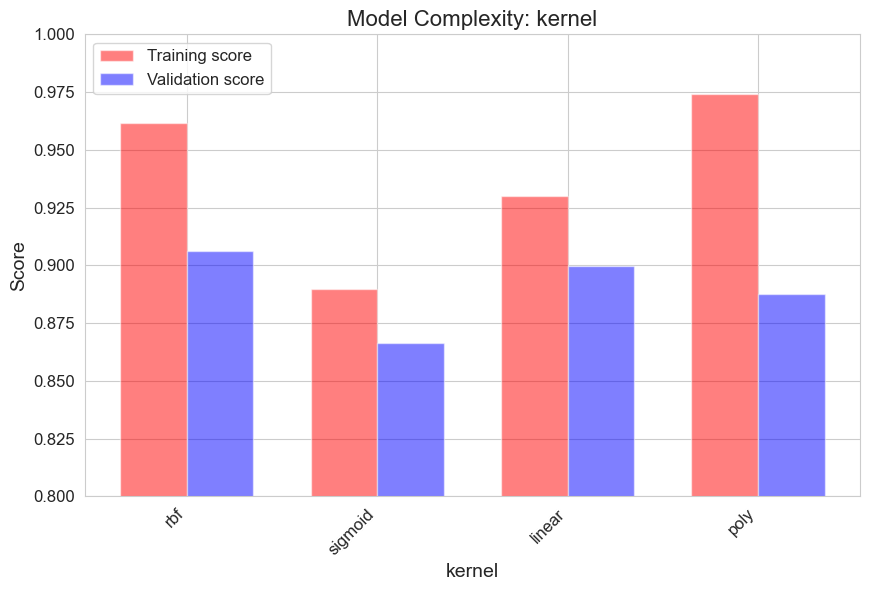

In [27]:
sub_cv_results_df = cv_results_df[cv_results_df['gamma'] == 'scale']
cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'kernel','mean_train_score', 'mean_test_score', 'Model Complexity: kernel')
ax.set_ylim(bottom=0.8, top=1)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_kernel', name)

Plot saved successfully at figures/dataset2/svm_cc_gamma_nlp.png


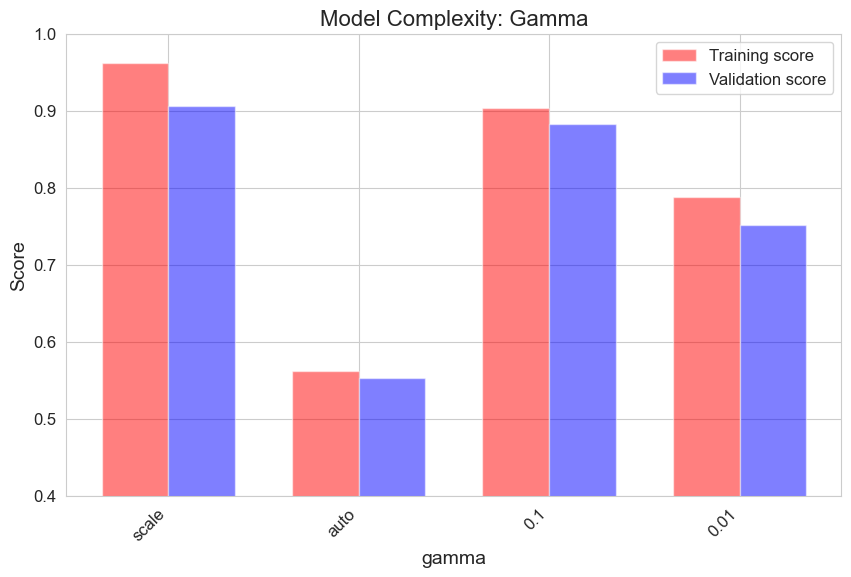

In [31]:
# gamma
sub_cv_results_df = cv_results_df[cv_results_df['kernel'] == 'rbf']

cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'gamma','mean_train_score', 'mean_test_score', 'Model Complexity: Gamma')
ax.set_ylim(bottom=0.4, top=1)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_gamma', name)

## Training time

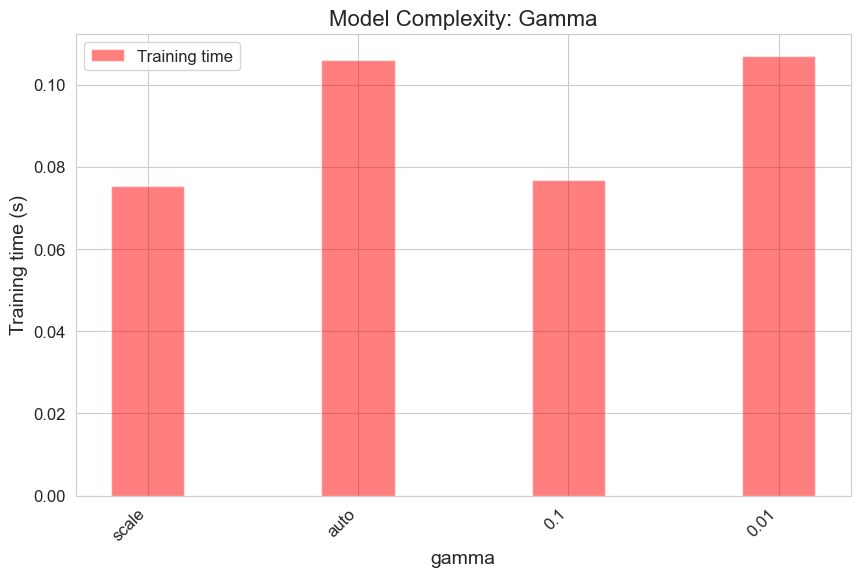

In [32]:
tt_plt = plot_training_time(sub_cv_results_df, 'gamma', 'mean_fit_time', 'Model Complexity: Gamma')

# Neural Network

In [41]:
# load the best model param
best_model = load_model(input_dir, 'nn', name)
metrics = load_metrics(input_dir, 'nn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs/nn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/nn_nlp_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [350], 'learning_rate': 'adaptive', 'learning_rate_init': 0.08, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.8877551020408163, 'precision': 0.9408866995073891, 'recall': 0.8565022421524664, 'f1': 0.8967136150234741}


## learning curve

In [42]:
lc_data = load_metrics(input_dir, 'nn', f'{name}_lc')

Metrics loaded successfully from results/dataset2/model_outputs/nn_nlp_lc_metrics.json


Plot saved successfully at figures/dataset2/nn_lc_nlp.png


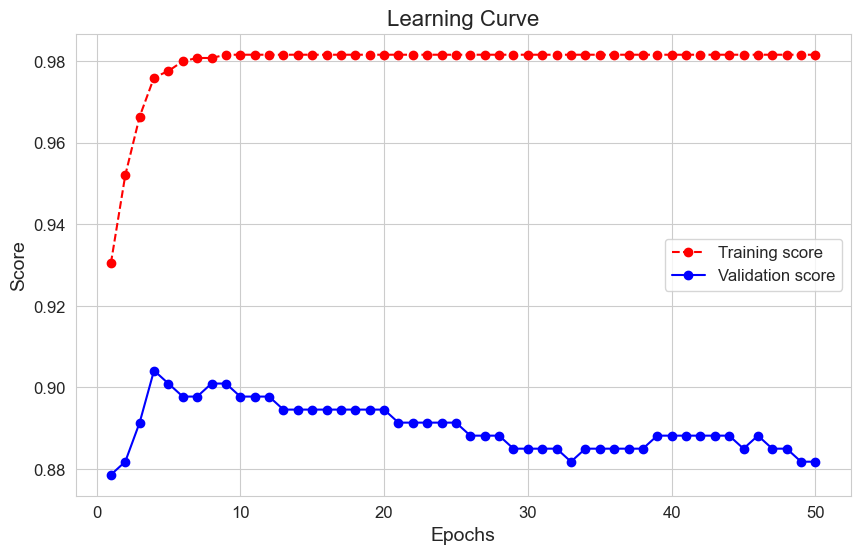

In [43]:
lc_plot = plot_learning_curve(lc_data, 'nn')
# save
save_plot(lc_plot, output_dir, 'nn', 'lc', name)

## Complexity curve

In [44]:
cv_results_df = pd.read_csv(f'{input_dir}/nn_cv_results.csv')
cv_results_df

,hidden_layer_sizes,learning_rate,learning_rate_init,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,[50],adaptive,1.0000,0.092906,0.024355,0.000345,0.000010,0.868303,0.017907,0.938138,0.011160,0.061862,0.131697
1,[50],adaptive,0.5000,0.065917,0.019082,0.000378,0.000089,0.870861,0.021071,0.943098,0.016430,0.056902,0.129139
2,[50],adaptive,0.1000,0.047000,0.005631,0.000450,0.000222,0.868926,0.010105,0.942141,0.019996,0.057859,0.131074
3,[50],adaptive,0.0800,0.043335,0.009533,0.000352,0.000056,0.872778,0.015988,0.940698,0.020236,0.059302,0.127222
4,[50],adaptive,0.0600,0.037823,0.005891,0.000573,0.000327,0.865086,0.012235,0.916563,0.015434,0.083437,0.134914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,"[250, 150]",adaptive,0.0100,0.310922,0.026948,0.001192,0.000048,0.866382,0.016495,0.944379,0.019084,0.055621,0.133618
152,"[250, 150]",adaptive,0.0050,0.377727,0.089317,0.001712,0.001030,0.880458,0.020373,0.958602,0.012723,0.041398,0.119542
153,"[250, 150]",adaptive,0.0010,0.457878,0.054511,0.001183,0.000031,0.878527,0.013775,0.943897,0.013941,0.056103,0.121473
154,"[250, 150]",adaptive,0.0005,0.581214,0.086175,0.001156,0.000056,0.877247,0.012800,0.944217,0.014406,0.055783,0.122753


### Hidden layers

Plot saved successfully at figures/dataset2/nn_cc_nlp.png


/var/folders/8m/ddcyb_xx6hx0nx6yr5msflfm0000gn/T/ipykernel_48006/311514626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)


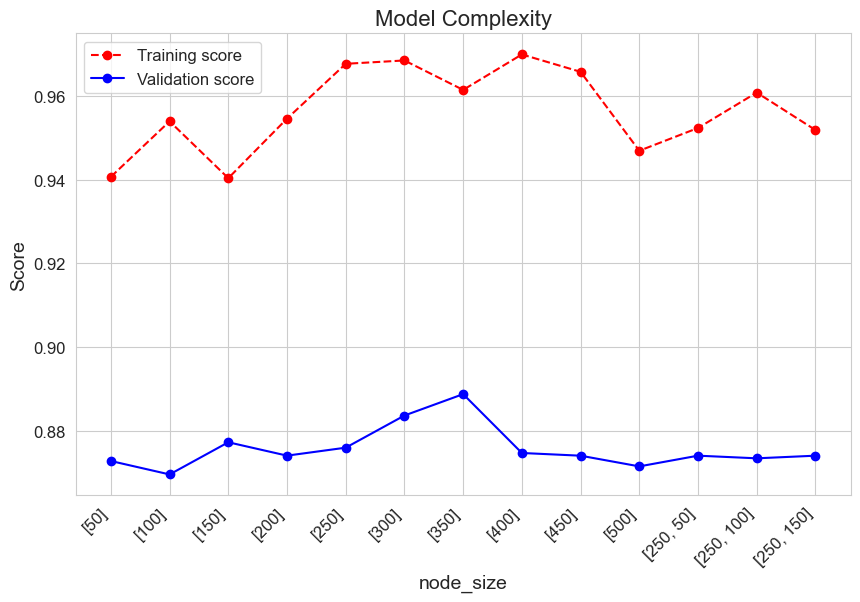

In [48]:
# turn the hidden_layer_sizes into number first and second hidden layer size
sub_cv_results_df = cv_results_df[cv_results_df['learning_rate_init'] == best_model.get_params().get('learning_rate_init')]
sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)
lr_plt, ax= plot_complexity_curve(sub_cv_results_df, 'node_size','mean_train_score', 'mean_test_score', 'Model Complexity')
# set the x ticks
ax.set_xticks(sub_cv_results_df['node_size'])
ax.set_xticklabels(sub_cv_results_df['hidden_layer_sizes'], rotation=45, ha='right')
# save
save_plot(lr_plt, output_dir, 'nn', 'cc', name)

# Boosting

In [74]:
# load the best model param
best_model = load_model(input_dir, 'boosting', name)
metrics = load_metrics(input_dir, 'boosting', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs/boosting_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/boosting_nlp_metrics.json
the best model params: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 17, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9158163265306123, 'precision': 0.9611650485436893, 'recall': 0.8878923766816144, 'f1': 0.9230769230769231}


Metrics loaded successfully from results/dataset2/model_outputs/boosting_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/boosting_lc_nlp.png


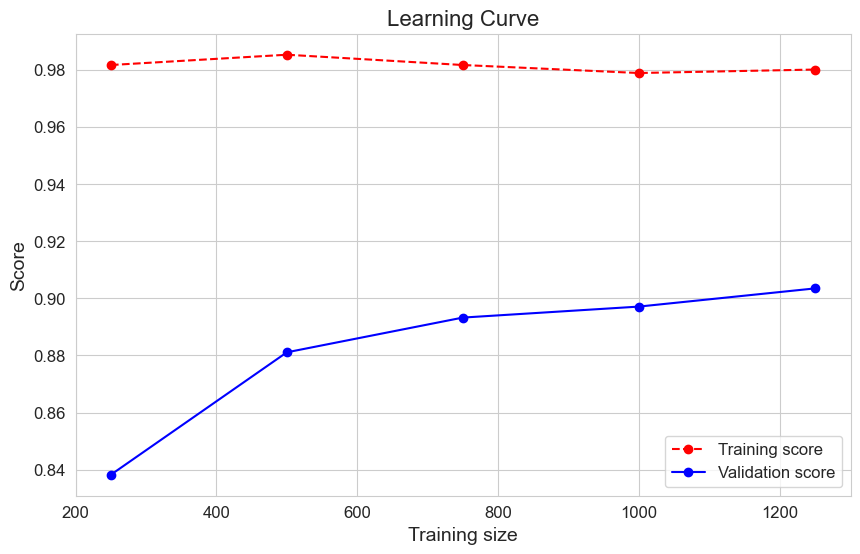

In [75]:
lc_data = load_metrics(input_dir, 'boosting', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'boosting')
# save 
save_plot(lc_plot, output_dir, 'boosting', 'lc', name)

## Complexity curve

In [76]:
cv_results_df = pd.read_csv(f'{input_dir}/boosting_cv_results.csv')
cv_results_df

,max_depth,n_estimators,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,10,50,0.432790,0.027808,0.001056,0.000084,0.898980,0.011510,0.975384,0.000928,0.024616,0.101020
1,10,100,0.906976,0.017772,0.001649,0.000088,0.899615,0.008249,0.979060,0.001706,0.020940,0.100385
2,10,150,1.339452,0.017983,0.003004,0.001298,0.897698,0.007001,0.980019,0.001428,0.019981,0.102302
3,10,200,1.820515,0.043153,0.003134,0.000050,0.898976,0.006275,0.980019,0.001428,0.019981,0.101024
4,10,250,2.356843,0.051704,0.004664,0.001641,0.897698,0.006063,0.980019,0.001428,0.019981,0.102302
5,15,50,0.635733,0.074922,0.001315,0.000035,0.903453,0.007111,0.978900,0.001565,0.021100,0.096547
6,15,100,1.333966,0.038055,0.003090,0.000702,0.904729,0.006236,0.980019,0.001428,0.019981,0.095271
7,15,150,1.962382,0.043641,0.005291,0.001339,0.900895,0.008809,0.980019,0.001428,0.019981,0.099105
8,15,200,2.642590,0.048335,0.005481,0.000892,0.900256,0.008896,0.980019,0.001428,0.019981,0.099744
9,15,250,3.463789,0.095502,0.007622,0.001985,0.898339,0.006800,0.980019,0.001428,0.019981,0.101661


### Complexity: number of trees

the max_depth: 20
Plot saved successfully at figures/dataset2/boosting_cc_estimators_nlp.png


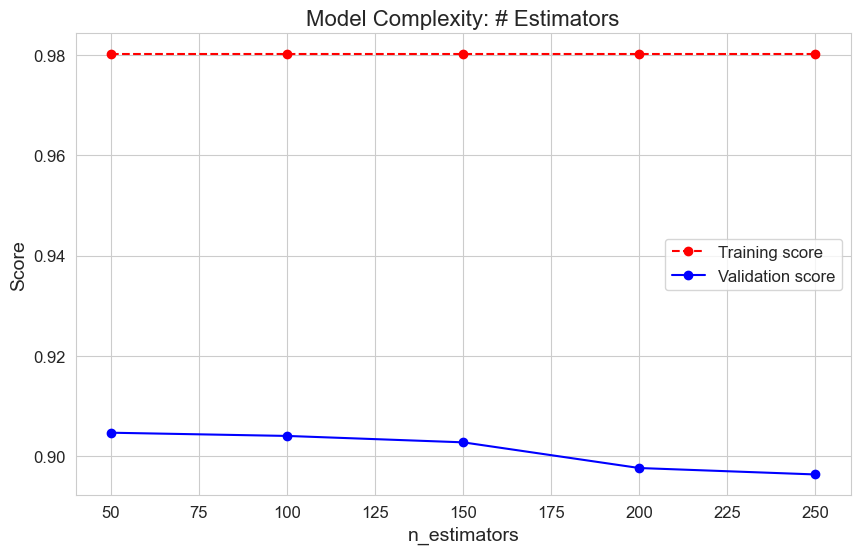

In [77]:
sub_cv_results_df = cv_results_df[cv_results_df['max_depth'] == best_model.get_params().get('max_depth')]
cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'n_estimators','mean_train_score', 'mean_test_score', 'Model Complexity: # Estimators')
print(f'the max_depth: {best_model.get_params().get("max_depth")}')
save_plot(cc_plt, output_dir, 'boosting', 'cc_estimators', name)

### Complexity: depth of trees

the n_estimators: 50
Plot saved successfully at figures/dataset2/boosting_cc_max_depth_nlp.png


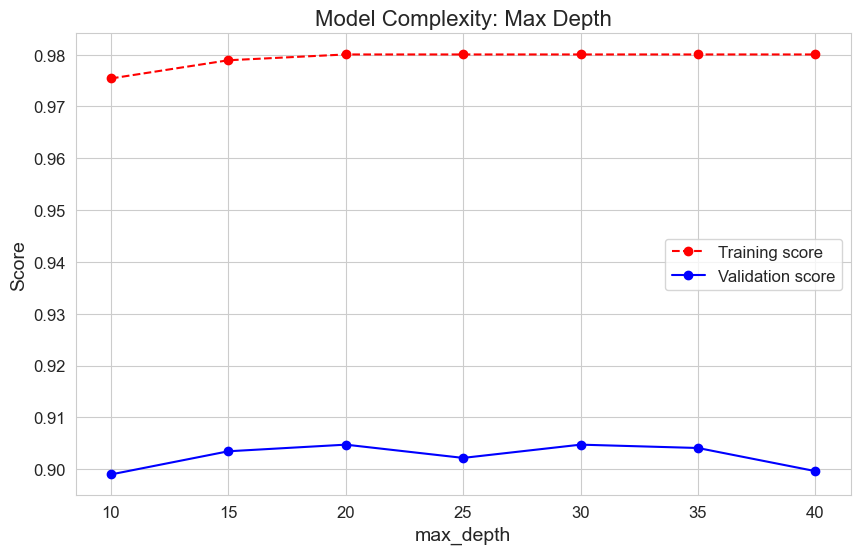

In [78]:
sub_cv_results_df = cv_results_df[cv_results_df['n_estimators'] == best_model.get_params().get('n_estimators')]
cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'max_depth','mean_train_score', 'mean_test_score', 'Model Complexity: Max Depth')
print(f'the n_estimators: {best_model.get_params().get("n_estimators")}')
save_plot(cc_plt, output_dir, 'boosting', 'cc_max_depth', name)

# Bert Embedding

In [82]:
input_dir = 'results/dataset2/model_outputs_bert_500'
output_dir = 'figures/dataset2_bert_500'
name = 'nlp'
if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)

## KNN

As number of neighbors = 20, compare the uniform and distance weight

In [81]:
# load the best model param
best_model = load_model(input_dir, 'knn', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
the metrics of testing dataset: {'accuracy': 0.8928571428571429, 'precision': 0.9330143540669856, 'recall': 0.874439461883408, 'f1': 0.9027777777777778}


### Learning Curve

Metrics loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2_bert_500/knn_lc_nlp.png


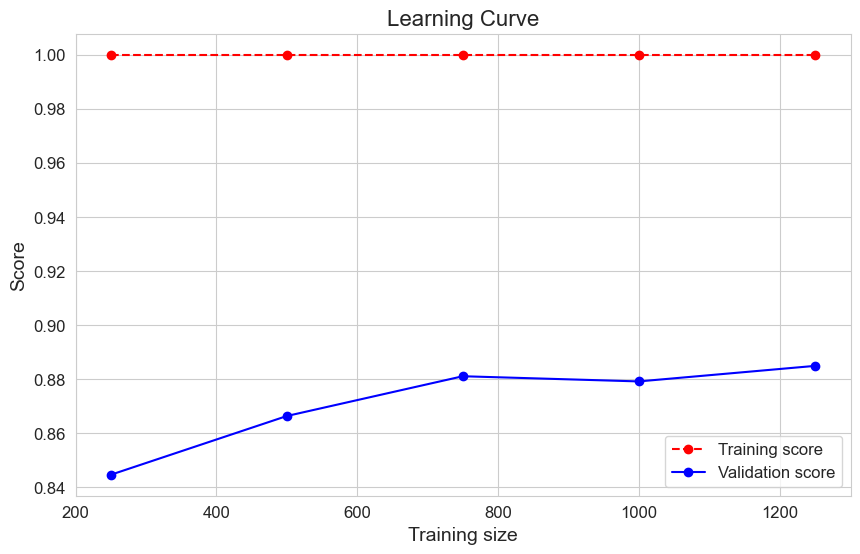

In [88]:
lc_data = load_metrics(input_dir, 'knn', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'knn')
# save 
save_plot(lc_plot, output_dir, 'knn', 'lc', name)

### Complexity

Plot saved successfully at figures/dataset2_bert_500/knn_cc_neigbor_uniform_nlp.png


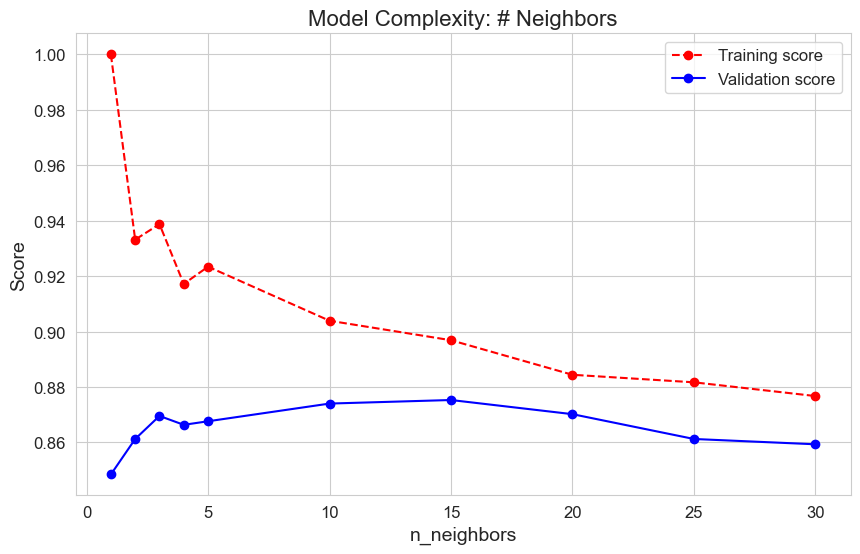

In [90]:
cv_results_uniform = cv_results_df[cv_results_df['weights']== 'uniform']
cc_plt, _ = plot_complexity_curve(cv_results_uniform, 'n_neighbors','mean_train_score', 'mean_test_score', 'Model Complexity: # Neighbors')
# save
save_plot(cc_plt, output_dir, 'knn', 'cc_neigbor_uniform', name)

Plot saved successfully at figures/dataset2_bert_500/knn_cc_neigbor_distance_nlp.png


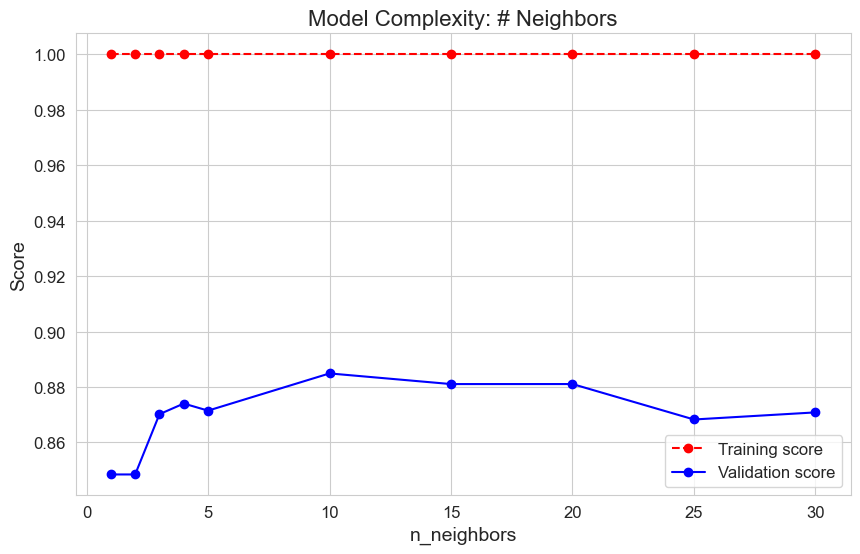

In [91]:
cv_results_distance = cv_results_df[cv_results_df['weights']== 'distance']
cc_plt, _ = plot_complexity_curve(cv_results_distance, 'n_neighbors','mean_train_score', 'mean_test_score', 'Model Complexity: # Neighbors')
# save
save_plot(cc_plt, output_dir, 'knn', 'cc_neigbor_distance', name)

## SVM

In [93]:
best_model = load_model(input_dir, 'svm', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs_bert_500/svm_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp_metrics.json
the best model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': 17, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.8928571428571429, 'precision': 0.9330143540669856, 'recall': 0.874439461883408, 'f1': 0.9027777777777778}


Metrics loaded successfully from results/dataset2/model_outputs_bert_500/svm_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2_bert_500/svm_lc_nlp.png


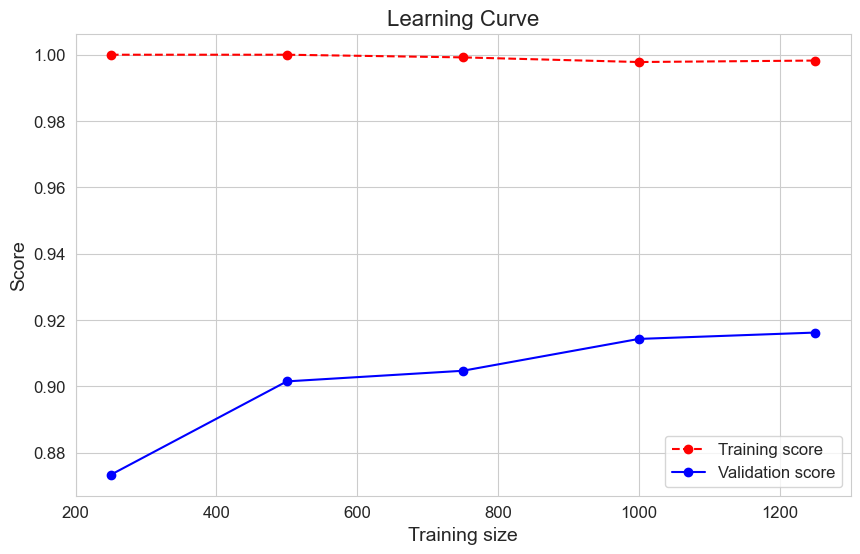

In [94]:
lc_data = load_metrics(input_dir, 'svm', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'svm')
# save 
save_plot(lc_plot, output_dir, 'svm', 'lc', name)

Plot saved successfully at figures/dataset2_bert_500/svm_cc_kernel_nlp.png


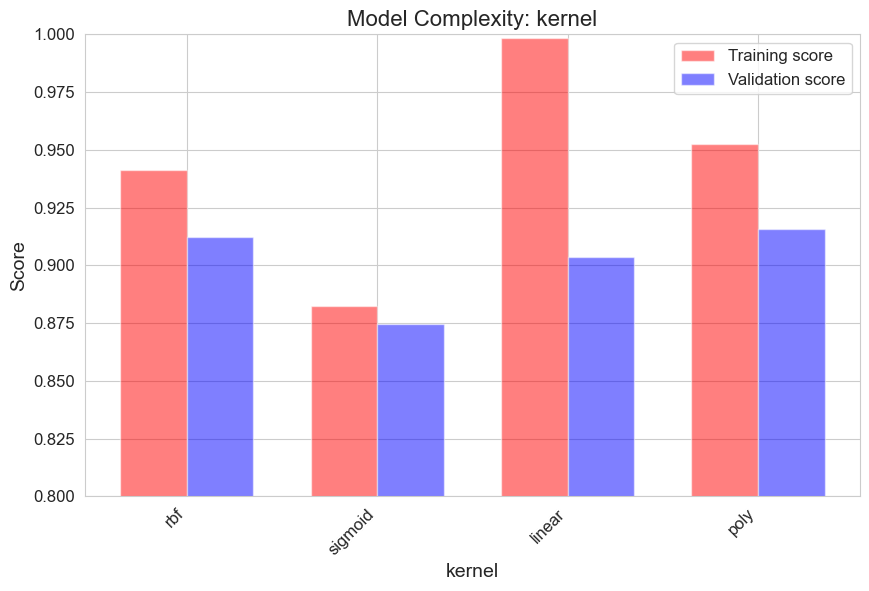

In [95]:
cv_results_df = pd.read_csv(f'{input_dir}/svm_cv_results.csv')
sub_cv_results_df = cv_results_df[cv_results_df['gamma'] == 'scale']
cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'kernel','mean_train_score', 'mean_test_score', 'Model Complexity: kernel')
ax.set_ylim(bottom=0.8, top=1)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_kernel', name)

Plot saved successfully at figures/dataset2_bert_500/svm_cc_gamma_nlp.png


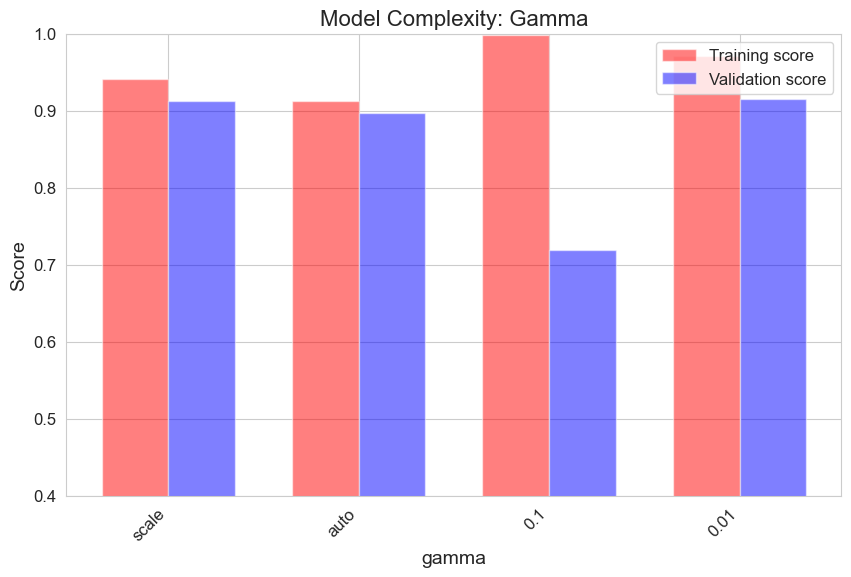

In [96]:
# gamma
sub_cv_results_df = cv_results_df[cv_results_df['kernel'] == 'rbf']

cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'gamma','mean_train_score', 'mean_test_score', 'Model Complexity: Gamma')
ax.set_ylim(bottom=0.4, top=1)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_gamma', name)

## NN
Study the adaptive learning rate with different initial learning rate.

In [97]:
# load the best model param
best_model = load_model(input_dir, 'nn', name)
metrics = load_metrics(input_dir, 'nn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset2/model_outputs_bert_500/nn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs_bert_500/nn_nlp_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [100], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9107142857142857, 'precision': 0.9653465346534653, 'recall': 0.874439461883408, 'f1': 0.9176470588235294}


Metrics loaded successfully from results/dataset2/model_outputs_bert_500/nn_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2_bert_500/nn_lc_nlp.png


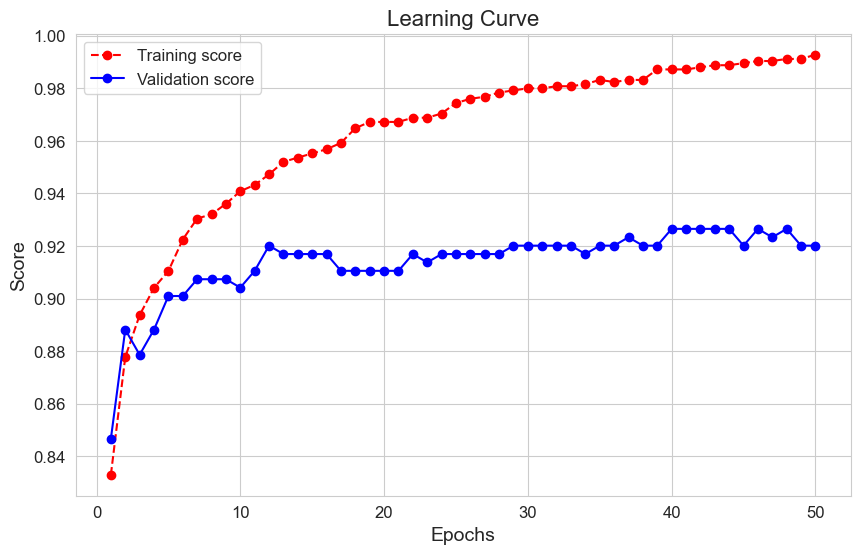

In [98]:
lc_data = load_metrics(input_dir, 'nn', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'nn')
# save
save_plot(lc_plot, output_dir, 'nn', 'lc', name)

## Complexity

the best learning_rate_init: 0.001
Plot saved successfully at figures/dataset2_bert_500/nn_cc_node_sizes_nlp.png


/var/folders/8m/ddcyb_xx6hx0nx6yr5msflfm0000gn/T/ipykernel_48006/1969977672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)


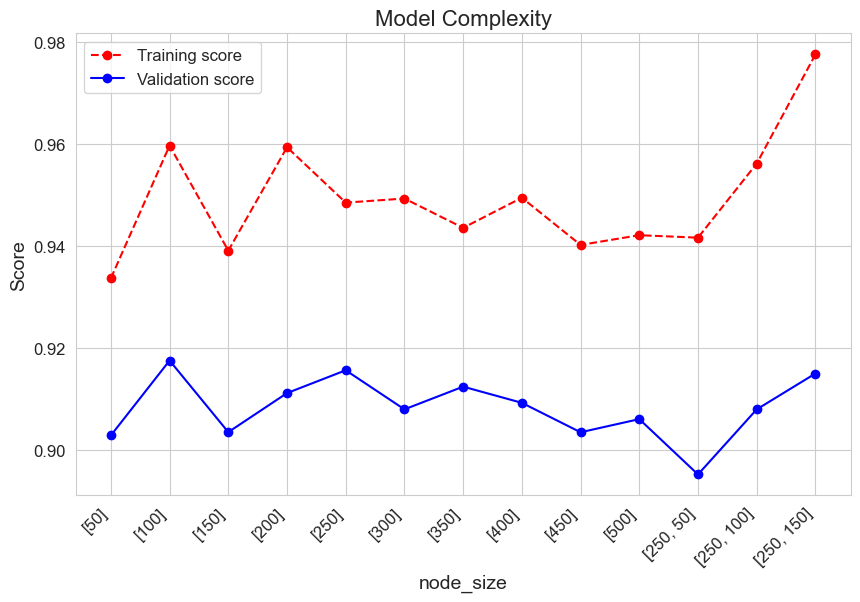

In [102]:
cv_results_df = pd.read_csv(f'{input_dir}/nn_cv_results.csv')
# turn the hidden_layer_sizes into number first and second hidden layer size
sub_cv_results_df = cv_results_df[cv_results_df['learning_rate_init'] == best_model.get_params().get('learning_rate_init')]
print('the best learning_rate_init:', best_model.get_params().get('learning_rate_init'))
sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)
lr_plt, ax= plot_complexity_curve(sub_cv_results_df, 'node_size','mean_train_score', 'mean_test_score', 'Model Complexity')
# set the x ticks
ax.set_xticks(sub_cv_results_df['node_size'])
ax.set_xticklabels(sub_cv_results_df['hidden_layer_sizes'], rotation=45, ha='right')
# save
save_plot(lr_plt, output_dir, 'nn', 'cc_node_sizes', name)

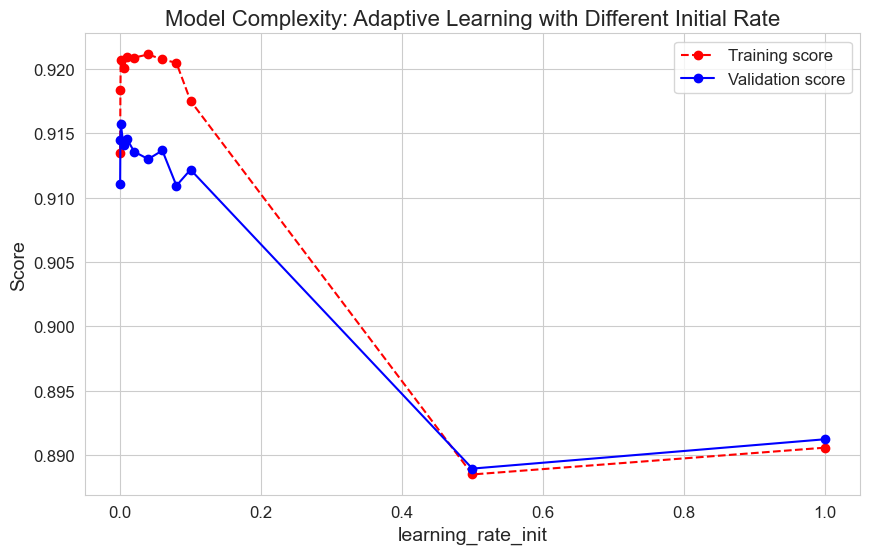

In [104]:
best_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [100],
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 17,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

the best hidden_layer_sizes: [100]
Plot saved successfully at figures/dataset2_bert_500/nn_cc_learning_rate_init_nlp.png


/var/folders/8m/ddcyb_xx6hx0nx6yr5msflfm0000gn/T/ipykernel_48006/1921828834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)


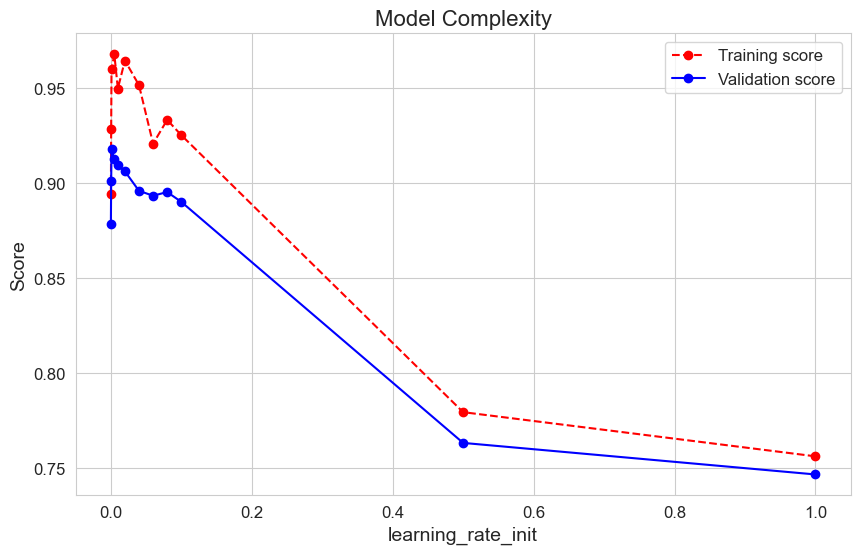

In [111]:
sub_cv_results_df = cv_results_df[cv_results_df['hidden_layer_sizes'] == '[100]']
print('the best hidden_layer_sizes:', best_model.get_params().get('hidden_layer_sizes'))
sub_cv_results_df['node_size'] = np.arange(1, sub_cv_results_df.shape[0]+1)
lr_plt, ax= plot_complexity_curve(sub_cv_results_df, 'learning_rate_init','mean_train_score', 'mean_test_score', 'Model Complexity')
#
# save
save_plot(lr_plt, output_dir, 'nn', 'cc_learning_rate_init', name)

## Boosting

In [113]:
# load the best model param
best_model = load_model(input_dir, 'boosting', name)
metrics = load_metrics(input_dir, 'boosting', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Error: Model file not found at results/dataset2/model_outputs_bert_500/boosting_nlp.joblib


FileNotFoundError: [Errno 2] No such file or directory: 'results/dataset2/model_outputs_bert_500/boosting_nlp_metrics.json'